# Cardiovascular desease detection

## Project by: PARAS VARSHNEY

### Importing Libraries

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.externals import joblib 
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

import scipy.stats as stats
from scipy.stats import norm ,rankdata

from scipy.special import boxcox1p
from scipy.stats import normaltest
import statsmodels
import statsmodels.api as sm
from scipy.optimize import curve_fit

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import xgboost as xgb

In [177]:
# raw_df = pd.read_csv(data_url, sep=";")
raw_df = pd.read_csv("cardio_train.csv", sep=";")
raw_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [178]:
print("Data Shape: "+str(raw_df.shape))
print()
print("Columns: "+str(raw_df.columns))
print()
print(raw_df.info())

Data Shape: (69301, 13)

Columns: Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [179]:
raw_df.gender.value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [180]:
raw_df.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [181]:
def draw_violin_plots():
    fig, axes = plt.subplots(1, 3, figsize=(21,6))
    sns.violinplot(x="cardio", y="age", data=raw_df, ax=axes[0])
    sns.violinplot(x="cardio", y="height", data=raw_df, ax=axes[1])
    sns.violinplot(x="cardio", y="weight", data=raw_df, ax=axes[2])

    fig, axes = plt.subplots(1, 2, figsize=(21,6))
    sns.violinplot(x="cardio", y="ap_hi", data=raw_df, ax=axes[0])
    sns.violinplot(x="cardio", y="ap_lo", data=raw_df, ax=axes[1])

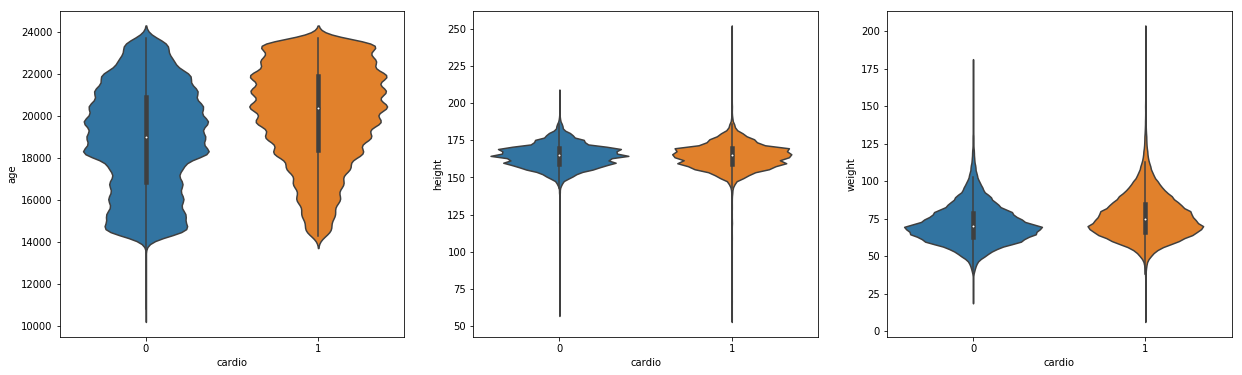

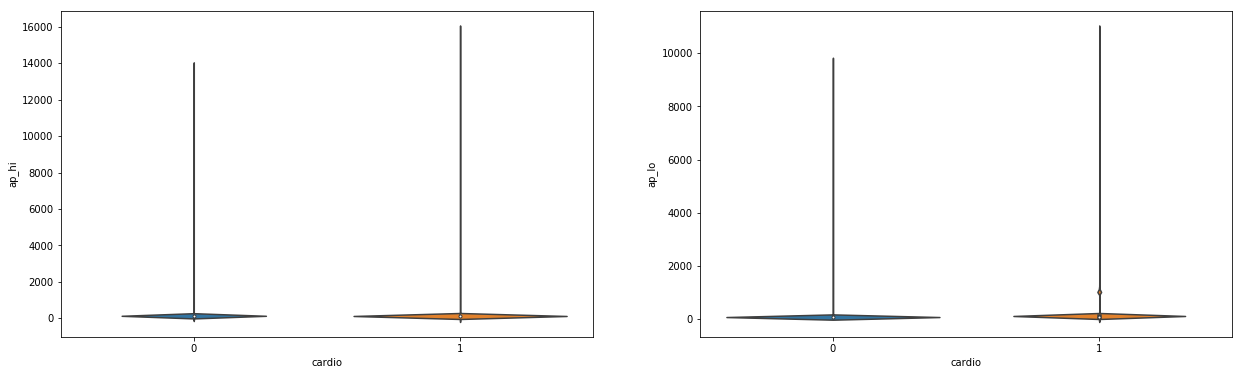

In [182]:
draw_violin_plots()

In [183]:
def plot_scatter(data):
    fig, ax = plt.subplots(figsize=(21,6))
    ax.scatter(range(len(data)), data)
    ax.set_xlabel("values")
    ax.set_ylabel("data point")
    plt.show()


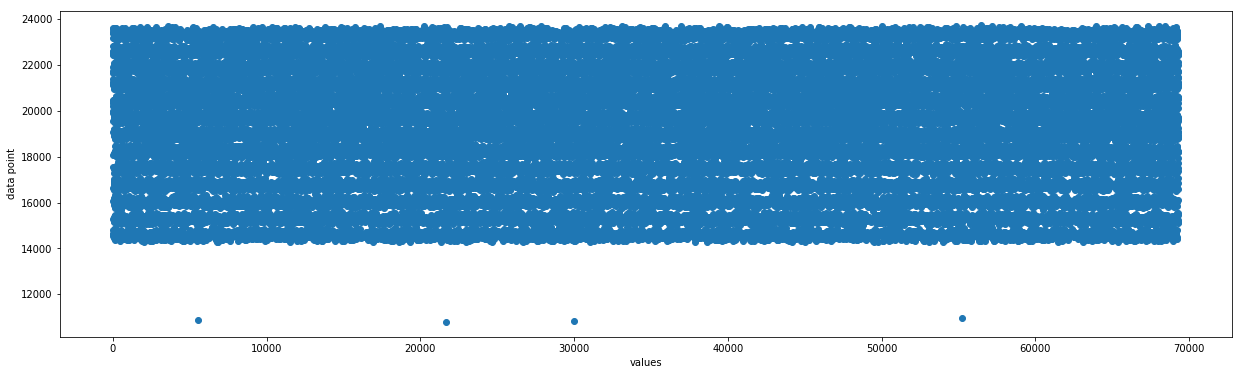

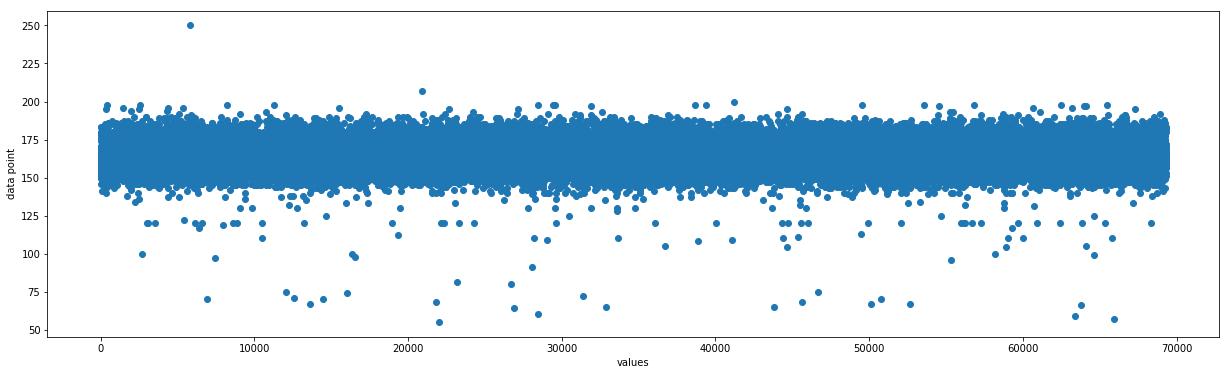

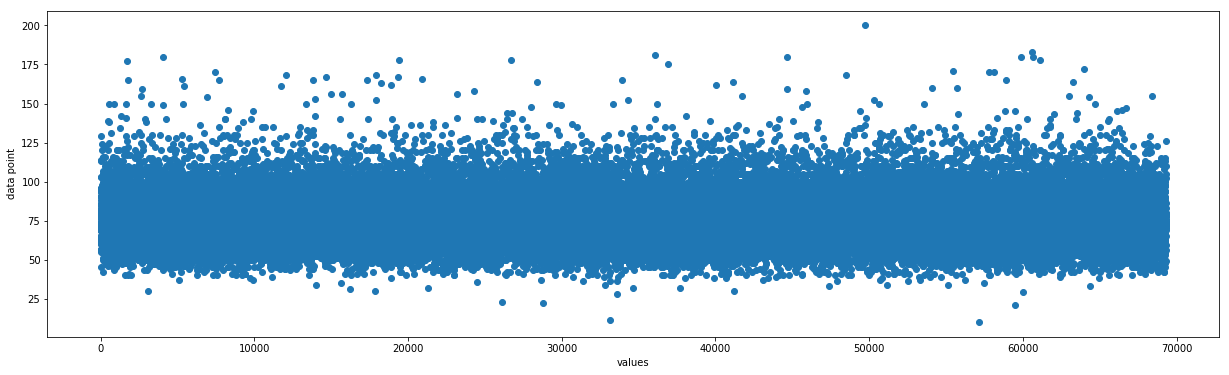

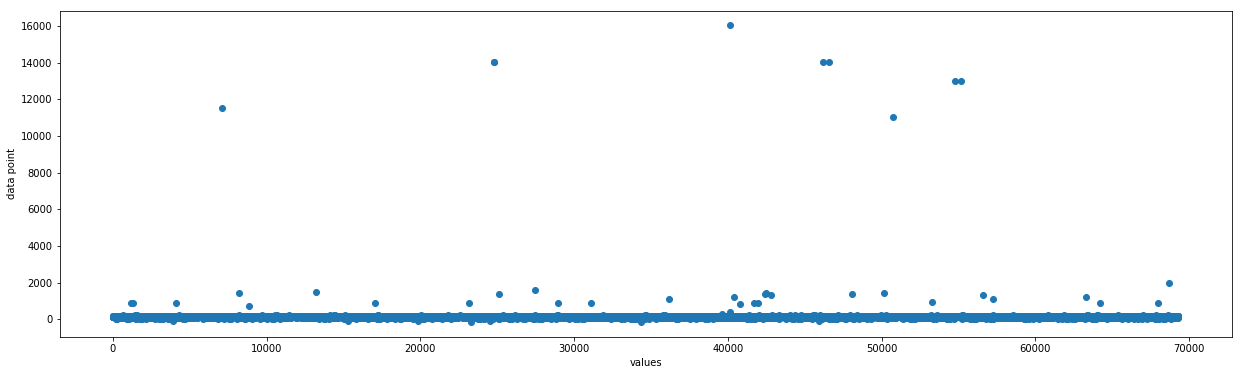

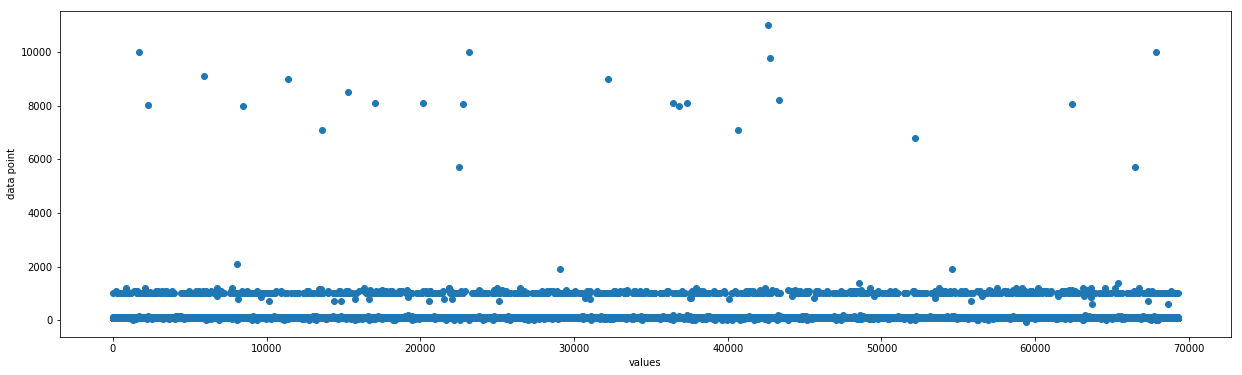

In [184]:
data = raw_df["age"]
plot_scatter(data)

data = raw_df["height"]
plot_scatter(data)

data = raw_df["weight"]
plot_scatter(data)

data = raw_df["ap_hi"]
plot_scatter(data)

data = raw_df["ap_lo"]
plot_scatter(data)

In [185]:
z = np.abs(stats.zscore(raw_df))

Q1 = raw_df.quantile(0.25)
Q3 = raw_df.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)

In [186]:
# # raw_df[["age"]] = 


# # age = 3.4 (5142)
# # height = 5 (422)
# # weight = 5 (422)
# # ap_hi = 5 (422)
# # ap_lo = 

# dx = pd.DataFrame(raw_df["ap_lo"][(z < 6).all(axis=1)])

# # data = raw_df["age"]
# plot_scatter(dx)
# len(raw_df["ap_lo"])-dx.size

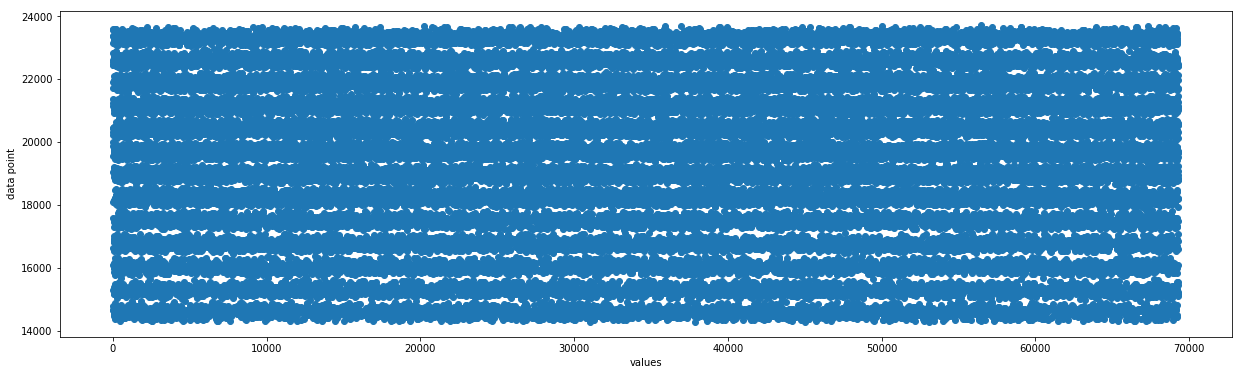

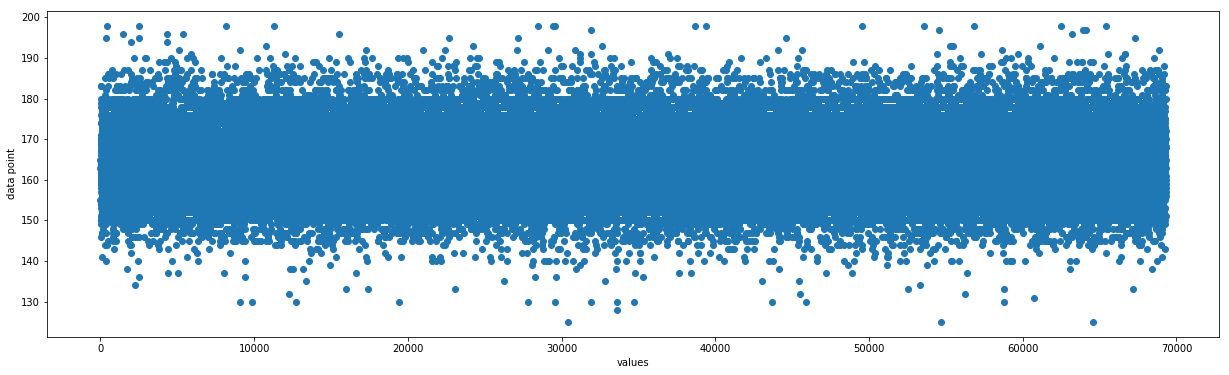

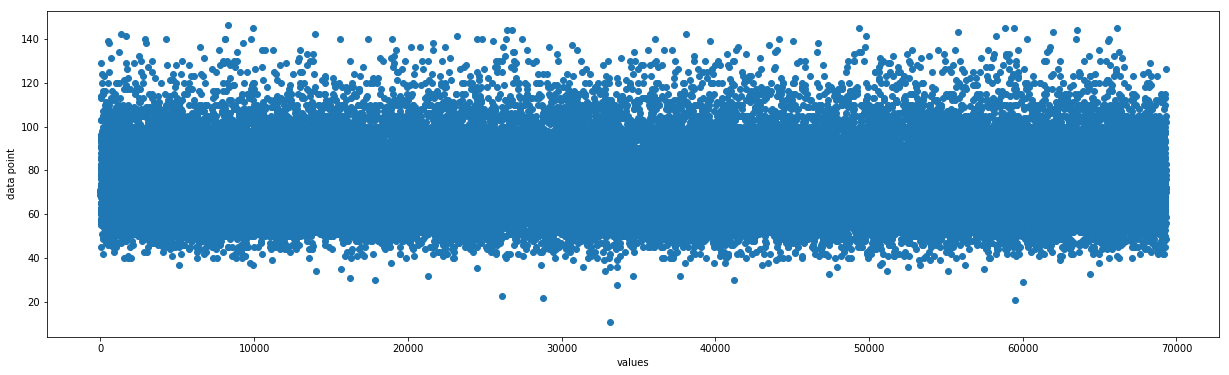

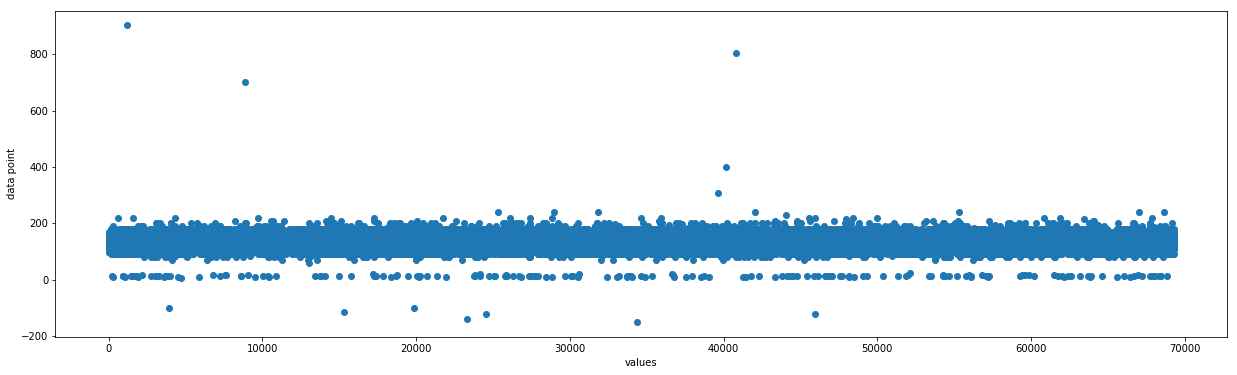

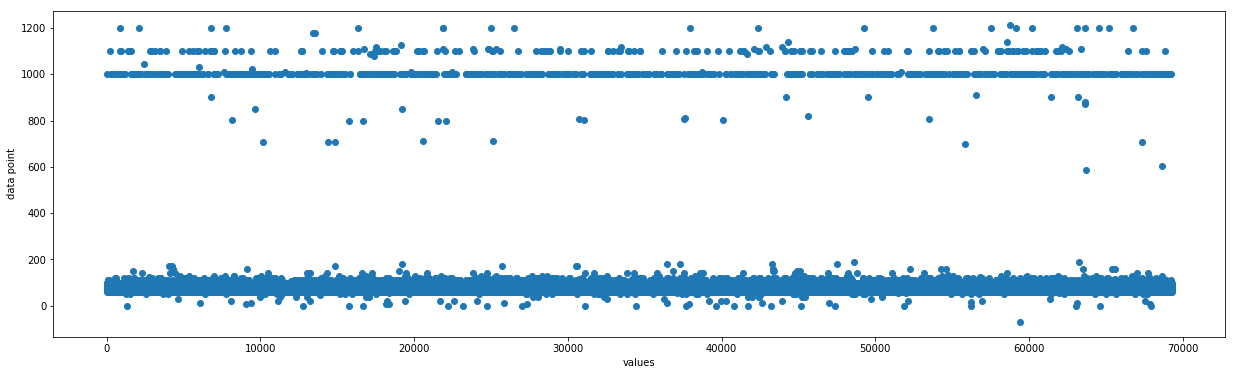

In [187]:
raw_df[["age"]] = raw_df[["age"]][(z < 3.4).all(axis=1)]
raw_df[["height"]] = raw_df[["height"]][(z < 5).all(axis=1)]
raw_df[["weight"]] = raw_df[["weight"]][(z < 5).all(axis=1)]
raw_df[["ap_hi"]] = raw_df[["ap_hi"]][(z < 5).all(axis=1)]
raw_df[["ap_lo"]] = raw_df[["ap_lo"]][(z < 6).all(axis=1)]

data = raw_df["age"]
plot_scatter(data)

data = raw_df["height"]
plot_scatter(data)

data = raw_df["weight"]
plot_scatter(data)

data = raw_df["ap_hi"]
plot_scatter(data)

data = raw_df["ap_lo"]
plot_scatter(data)

In [188]:
 raw_df["ap_hi"].shape

(69301,)

In [189]:
raw_df.isna().sum()

id                0
age            5142
gender            0
height          422
weight          422
ap_hi           422
ap_lo           135
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
dtype: int64

In [190]:
raw_df = raw_df.fillna(raw_df.mean())

In [191]:
def rank_based_normalization(x):  
    newX = norm.ppf(rankdata(x)/(len(x) + 1))
    return newX

In [192]:
def form_norm(dta):
    dta.sort()
    mean, std = stats.norm.fit(dta, loc=0)
    pdf_norm = stats.norm.pdf(dta, mean, std)
    return pdf_norm

In [167]:
def feature_engg(feature, oper):
        
    fig, axes = plt.subplots(1,2, figsize=(21,6))
    sns.distplot(feature, ax=axes[0])
    sm.qqplot(feature, stats.norm, fit=True, line='45', ax=axes[1]);
    k2_1, p1 = normaltest(feature)
    print("Normal test P1: ",p1)

    fig, axes = plt.subplots(1,2, figsize=(21,6))
    sns.distplot(oper, ax=axes[0])
    axes[0].set_xlabel('Normalized')
    sm.qqplot(oper, stats.norm, fit=True, line='45', ax=axes[1]);
    k2_2, p2 = normaltest(oper)
    print("Normal test P2: ",p2)
    return oper

In [63]:
# feature = raw_df['weight']

# tranformations = {'x': lambda x: x, '1/x': lambda x: 1/(x**2), '1/x': lambda x: 1/x, 'x**2': lambda x: x**2, 
#                   'x**3': lambda x: x**3, 'rank': lambda x: rank_based_normalization(x), 'log(x)': lambda x: np.log(x)}

# for i in tranformations: 
#     feature_engg(feature, tranformations[i](feature))

In [64]:
# feature = raw_df[['age']]
# raw_df['age'] = feature_engg(feature)

In [65]:
# x = raw_df['height']
# norm.ppf(norm.ppf(rankdata(x)/(len(x) + 1)))


# rank_based_normalization(feature)
# raw_df['height'] = 
# feature_engg(feature, rank_based_normalization(feature))


In [66]:
# feature = raw_df[['weight']]
# raw_df['weight'] = feature_engg(feature)

In [67]:
# feature = raw_df[['ap_hi']]
# raw_df['ap_hi'] = feature_engg(feature)

In [68]:
# feature = raw_df[['ap_lo']]
# raw_df['ap_lo'] = feature_engg(feature)

In [193]:
print(raw_df.head())
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'alco', 'active', 'cardio', 'cholesterol', 'gluc'

raw_df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] = pd.DataFrame(
    scaler.fit_transform(raw_df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]))

print(raw_df)

# fig, axes = plt.subplots(1,2, figsize=(21,6))
# sns.distplot(x_a, ax=axes[0])
# sm.qqplot(x_a, stats.norm, fit=True, line='45', ax=axes[1]);
# k2_1, p1 = normaltest(x_a)
# print("Normal test P1: ",p1)

    id           age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  988  22469.000000       1   155.0    69.0  130.0   80.0            2     2   
1  989  14648.000000       1   163.0    71.0  110.0   70.0            1     1   
2  990  21901.000000       1   165.0    70.0  120.0   80.0            1     1   
3  991  19482.713337       2   165.0    85.0  120.0   80.0            1     1   
4  992  23393.000000       1   155.0    62.0  120.0   80.0            1     1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       1       0  
3      1     1       1       0  
4      0     0       1       0  
          id       age  gender    height    weight     ap_hi     ap_lo  \
0        988  0.868192       1  0.410959  0.429630  0.266160  0.117096   
1        989  0.039521       1  0.520548  0.444444  0.247148  0.109290   
2        990  0.808010       1  0.547945  0.437037  0.256654  0.117096   
3        991  0.551

[69301 rows x 13 columns]


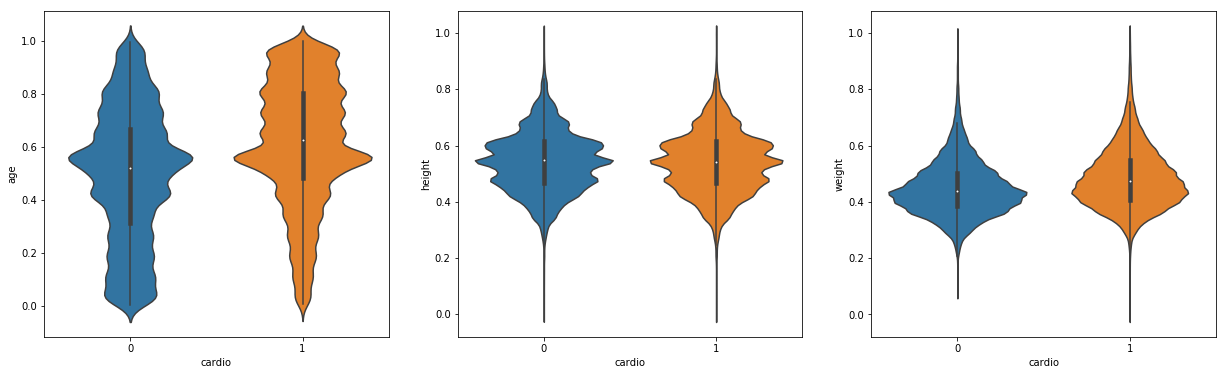

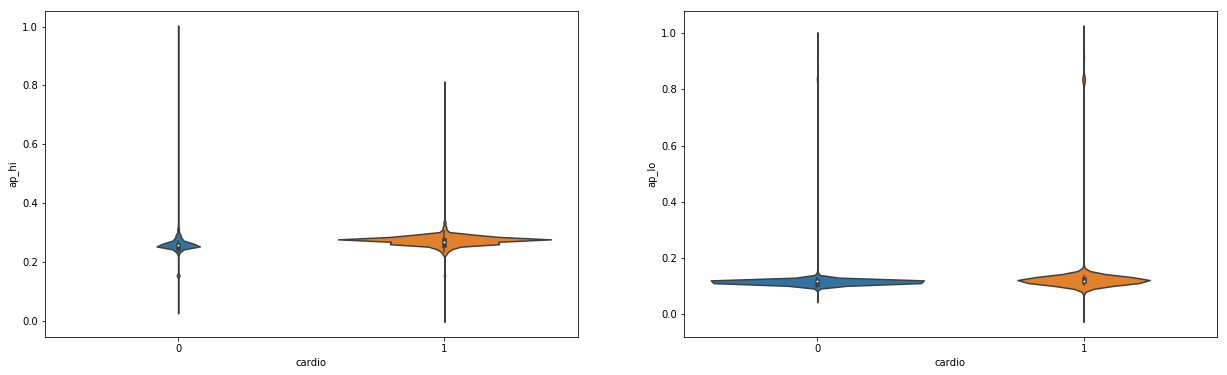

In [194]:
draw_violin_plots()

In [195]:
print(raw_df.shape)
print(raw_df.isna().sum())
raw_df.head()

(69301, 13)
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,0.868192,1,0.410959,0.429630,0.266160,0.117096,2,2,0,0,1,0
1,989,0.039521,1,0.520548,0.444444,0.247148,0.109290,1,1,0,0,1,1
2,990,0.808010,1,0.547945,0.437037,0.256654,0.117096,1,1,0,0,1,0
3,991,0.551781,2,0.547945,0.548148,0.256654,0.117096,1,1,1,1,1,0
4,992,0.966095,1,0.410959,0.377778,0.256654,0.117096,1,1,0,0,1,0


In [196]:
raw_df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] = np.log1p(raw_df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])

In [200]:
print(raw_df.shape)
print(raw_df.isna().sum())
raw_df.head()

(69301, 13)
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,0.624971,1,0.344270,0.357415,0.235988,0.110732,2,2,0,0,1,0
1,989,0.038760,1,0.419071,0.367725,0.220860,0.103720,1,1,0,0,1,1
2,990,0.592227,1,0.436928,0.362583,0.228453,0.110732,1,1,0,0,1,0
3,991,0.439404,2,0.436928,0.437059,0.228453,0.110732,1,1,1,1,1,0
4,992,0.676049,1,0.344270,0.320472,0.228453,0.110732,1,1,0,0,1,0


In [198]:
# raw_df = raw_df.replace([np.inf, -np.inf], np.nan)

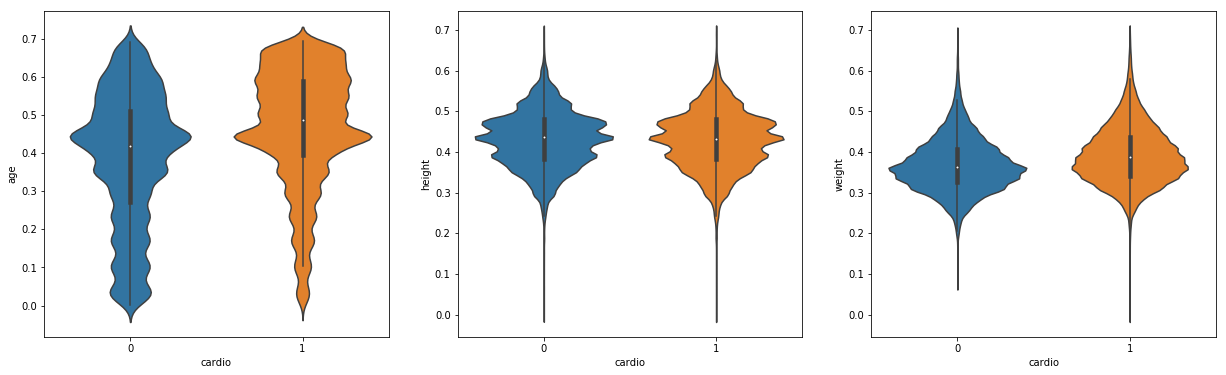

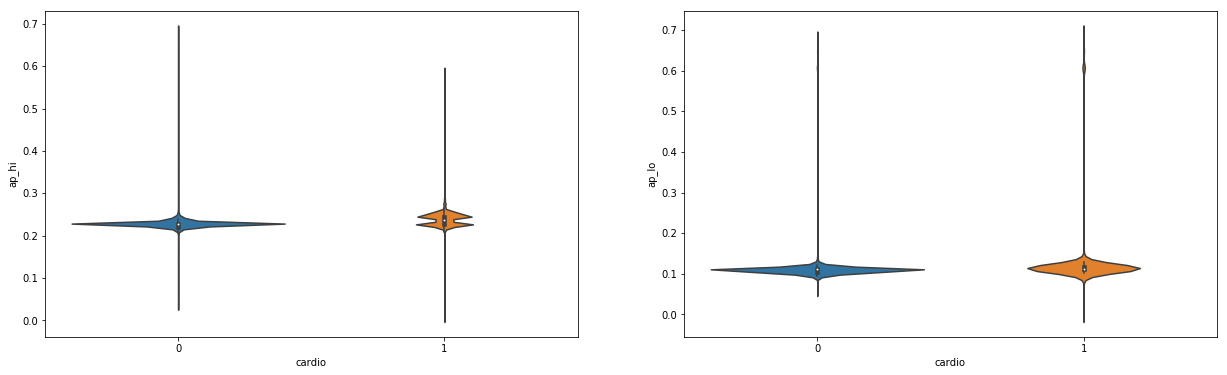

In [199]:
draw_violin_plots()

In [207]:
raw_df["gender"][raw_df["gender"][raw_df["gender"] == 2].index] = 0

In [208]:
raw_df.to_csv('clean_df.csv', index = False)
raw_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,0.624971,1,0.344270,0.357415,0.235988,0.110732,2,2,0,0,1,0
1,989,0.038760,1,0.419071,0.367725,0.220860,0.103720,1,1,0,0,1,1
2,990,0.592227,1,0.436928,0.362583,0.228453,0.110732,1,1,0,0,1,0
3,991,0.439404,0,0.436928,0.437059,0.228453,0.110732,1,1,1,1,1,0
4,992,0.676049,1,0.344270,0.320472,0.228453,0.110732,1,1,0,0,1,0


### Model Building

In [209]:
clean_df = pd.read_csv("clean_df.csv")
clean_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,0.624971,1,0.344270,0.357415,0.235988,0.110732,2,2,0,0,1,0
1,989,0.038760,1,0.419071,0.367725,0.220860,0.103720,1,1,0,0,1,1
2,990,0.592227,1,0.436928,0.362583,0.228453,0.110732,1,1,0,0,1,0
3,991,0.439404,0,0.436928,0.437059,0.228453,0.110732,1,1,1,1,1,0
4,992,0.676049,1,0.344270,0.320472,0.228453,0.110732,1,1,0,0,1,0


In [210]:
df_X = clean_df.drop(["id", "cardio"], axis=1)
df_y = clean_df.loc[:, "cardio"]

In [211]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [212]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train, X_test)

[[-0.89168022  0.7330432  -1.50295643 ... -0.31186032 -0.23863407
   0.49497815]
 [ 0.38684187  0.7330432   0.23293135 ... -0.31186032 -0.23863407
   0.49497815]
 [-0.15833525  0.7330432  -0.27915688 ... -0.31186032 -0.23863407
  -2.0202912 ]
 ...
 [ 1.42784078  0.7330432  -0.81021559 ... -0.31186032 -0.23863407
   0.49497815]
 [-0.85075293 -1.36417608  0.10661383 ... -0.31186032 -0.23863407
   0.49497815]
 [-1.07582598  0.7330432   0.48227583 ... -0.31186032 -0.23863407
   0.49497815]] [[ 0.4442294  -1.36417608  1.78115864 ... -0.31186032 -0.23863407
   0.49497815]
 [-0.19929157 -1.36417608  1.08730004 ... -0.31186032 -0.23863407
   0.49497815]
 [-0.66481798  0.7330432  -0.94611183 ... -0.31186032 -0.23863407
   0.49497815]
 ...
 [ 0.4363343  -1.36417608  1.43842647 ... -0.31186032 -0.23863407
   0.49497815]
 [ 0.90950972  0.7330432  -1.08330854 ... -0.31186032 -0.23863407
   0.49497815]
 [ 1.49258164 -1.36417608  0.35814565 ... -0.31186032 -0.23863407
  -2.0202912 ]]


In [215]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = df_X.shape[1]))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(df_X, df_y, batch_size = 10, epochs = 5)

Train on 69301 samples
Epoch 1/5
69301/69301 [==============================] - ETA: 12:40 - loss: 0.6931 - acc: 0.70 - ETA: 22s - loss: 0.6933 - acc: 0.4673 - ETA: 14s - loss: 0.6932 - acc: 0.47 - ETA: 12s - loss: 0.6931 - acc: 0.49 - ETA: 10s - loss: 0.6930 - acc: 0.50 - ETA: 10s - loss: 0.6927 - acc: 0.51 - ETA: 9s - loss: 0.6928 - acc: 0.5141 - ETA: 9s - loss: 0.6926 - acc: 0.517 - ETA: 8s - loss: 0.6927 - acc: 0.516 - ETA: 8s - loss: 0.6928 - acc: 0.513 - ETA: 8s - loss: 0.6929 - acc: 0.511 - ETA: 8s - loss: 0.6928 - acc: 0.513 - ETA: 7s - loss: 0.6930 - acc: 0.509 - ETA: 7s - loss: 0.6931 - acc: 0.506 - ETA: 7s - loss: 0.6931 - acc: 0.505 - ETA: 7s - loss: 0.6929 - acc: 0.508 - ETA: 7s - loss: 0.6928 - acc: 0.508 - ETA: 7s - loss: 0.6926 - acc: 0.509 - ETA: 7s - loss: 0.6920 - acc: 0.514 - ETA: 7s - loss: 0.6920 - acc: 0.514 - ETA: 7s - loss: 0.6914 - acc: 0.518 - ETA: 7s - loss: 0.6910 - acc: 0.520 - ETA: 7s - loss: 0.6904 - acc: 0.522 - ETA: 6s - loss: 0.6898 - acc: 0.524 - ETA

68390/69301 [============================>.] - ETA: 1:16 - loss: 0.4540 - acc: 0.800 - ETA: 13s - loss: 0.6551 - acc: 0.622 - ETA: 13s - loss: 0.6453 - acc: 0.64 - ETA: 12s - loss: 0.6468 - acc: 0.63 - ETA: 12s - loss: 0.6470 - acc: 0.63 - ETA: 12s - loss: 0.6471 - acc: 0.62 - ETA: 11s - loss: 0.6459 - acc: 0.62 - ETA: 11s - loss: 0.6440 - acc: 0.62 - ETA: 11s - loss: 0.6445 - acc: 0.62 - ETA: 11s - loss: 0.6455 - acc: 0.62 - ETA: 11s - loss: 0.6469 - acc: 0.62 - ETA: 11s - loss: 0.6472 - acc: 0.62 - ETA: 11s - loss: 0.6469 - acc: 0.62 - ETA: 11s - loss: 0.6465 - acc: 0.62 - ETA: 11s - loss: 0.6454 - acc: 0.62 - ETA: 11s - loss: 0.6463 - acc: 0.62 - ETA: 11s - loss: 0.6451 - acc: 0.63 - ETA: 11s - loss: 0.6439 - acc: 0.63 - ETA: 10s - loss: 0.6429 - acc: 0.63 - ETA: 10s - loss: 0.6411 - acc: 0.63 - ETA: 10s - loss: 0.6422 - acc: 0.63 - ETA: 10s - loss: 0.6432 - acc: 0.63 - ETA: 10s - loss: 0.6430 - acc: 0.63 - ETA: 10s - loss: 0.6432 - acc: 0.63 - ETA: 10s - loss: 0.6439 - acc: 0.63 - 

69301/69301 [==============================] - ETA: 0s - loss: 0.6429 - acc: 0.632 - ETA: 0s - loss: 0.6428 - acc: 0.632 - ETA: 0s - loss: 0.6427 - acc: 0.633 - 11s 160us/sample - loss: 0.6427 - acc: 0.6329
Epoch 3/5


69301/69301 [==============================] - ETA: 1:09 - loss: 0.7037 - acc: 0.400 - ETA: 14s - loss: 0.6545 - acc: 0.610 - ETA: 13s - loss: 0.6550 - acc: 0.63 - ETA: 12s - loss: 0.6465 - acc: 0.63 - ETA: 12s - loss: 0.6429 - acc: 0.62 - ETA: 12s - loss: 0.6446 - acc: 0.62 - ETA: 11s - loss: 0.6425 - acc: 0.63 - ETA: 11s - loss: 0.6445 - acc: 0.63 - ETA: 11s - loss: 0.6386 - acc: 0.64 - ETA: 11s - loss: 0.6389 - acc: 0.64 - ETA: 10s - loss: 0.6399 - acc: 0.63 - ETA: 10s - loss: 0.6425 - acc: 0.63 - ETA: 10s - loss: 0.6430 - acc: 0.63 - ETA: 10s - loss: 0.6426 - acc: 0.63 - ETA: 10s - loss: 0.6405 - acc: 0.63 - ETA: 10s - loss: 0.6421 - acc: 0.63 - ETA: 10s - loss: 0.6435 - acc: 0.63 - ETA: 10s - loss: 0.6438 - acc: 0.63 - ETA: 10s - loss: 0.6452 - acc: 0.62 - ETA: 9s - loss: 0.6459 - acc: 0.6281 - ETA: 9s - loss: 0.6464 - acc: 0.626 - ETA: 9s - loss: 0.6465 - acc: 0.626 - ETA: 9s - loss: 0.6463 - acc: 0.626 - ETA: 9s - loss: 0.6458 - acc: 0.627 - ETA: 9s - loss: 0.6449 - acc: 0.629 -

69301/69301 [==============================] - ETA: 1:02 - loss: 0.7261 - acc: 0.500 - ETA: 13s - loss: 0.6284 - acc: 0.680 - ETA: 12s - loss: 0.6335 - acc: 0.65 - ETA: 11s - loss: 0.6327 - acc: 0.64 - ETA: 11s - loss: 0.6323 - acc: 0.64 - ETA: 11s - loss: 0.6315 - acc: 0.64 - ETA: 11s - loss: 0.6386 - acc: 0.63 - ETA: 10s - loss: 0.6357 - acc: 0.64 - ETA: 10s - loss: 0.6392 - acc: 0.63 - ETA: 11s - loss: 0.6412 - acc: 0.63 - ETA: 11s - loss: 0.6406 - acc: 0.63 - ETA: 11s - loss: 0.6403 - acc: 0.63 - ETA: 11s - loss: 0.6404 - acc: 0.63 - ETA: 11s - loss: 0.6394 - acc: 0.63 - ETA: 11s - loss: 0.6381 - acc: 0.63 - ETA: 11s - loss: 0.6383 - acc: 0.63 - ETA: 11s - loss: 0.6387 - acc: 0.63 - ETA: 11s - loss: 0.6377 - acc: 0.63 - ETA: 10s - loss: 0.6372 - acc: 0.63 - ETA: 10s - loss: 0.6356 - acc: 0.63 - ETA: 10s - loss: 0.6359 - acc: 0.63 - ETA: 10s - loss: 0.6359 - acc: 0.63 - ETA: 10s - loss: 0.6354 - acc: 0.63 - ETA: 10s - loss: 0.6355 - acc: 0.63 - ETA: 10s - loss: 0.6344 - acc: 0.64 - 

69301/69301 [==============================] - ETA: 1:02 - loss: 0.7053 - acc: 0.500 - ETA: 12s - loss: 0.6159 - acc: 0.679 - ETA: 11s - loss: 0.6150 - acc: 0.66 - ETA: 11s - loss: 0.6141 - acc: 0.66 - ETA: 11s - loss: 0.6232 - acc: 0.65 - ETA: 11s - loss: 0.6267 - acc: 0.64 - ETA: 11s - loss: 0.6255 - acc: 0.64 - ETA: 10s - loss: 0.6304 - acc: 0.64 - ETA: 10s - loss: 0.6309 - acc: 0.64 - ETA: 10s - loss: 0.6290 - acc: 0.64 - ETA: 10s - loss: 0.6293 - acc: 0.64 - ETA: 10s - loss: 0.6301 - acc: 0.64 - ETA: 10s - loss: 0.6307 - acc: 0.64 - ETA: 9s - loss: 0.6306 - acc: 0.6495 - ETA: 9s - loss: 0.6313 - acc: 0.648 - ETA: 9s - loss: 0.6298 - acc: 0.651 - ETA: 9s - loss: 0.6307 - acc: 0.648 - ETA: 9s - loss: 0.6320 - acc: 0.645 - ETA: 9s - loss: 0.6308 - acc: 0.646 - ETA: 9s - loss: 0.6300 - acc: 0.647 - ETA: 9s - loss: 0.6309 - acc: 0.645 - ETA: 9s - loss: 0.6318 - acc: 0.644 - ETA: 9s - loss: 0.6307 - acc: 0.645 - ETA: 9s - loss: 0.6306 - acc: 0.644 - ETA: 9s - loss: 0.6314 - acc: 0.643 -

In [264]:
y_pred = classifier.predict(X_test)
# print("\nPredicted values: "+str(y_pred)+"\n")

for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

model_evaluation(y_test, y_pred)
        
        
def model_evaluation(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    print("Confusion Matrix:")
    print(cm, end="\n\n")

    TN = cm[0, 0]
    FN = cm[0, 1]
    FP = cm[1, 0]
    TP = cm[1, 1]

    P = FN+TP
    N = TN+FP

    TPR = TP/P
    TNR = TN/N
    FPR = FP/N
    FNR = FN/P

    accuracy = (TN+TP)/(P+N)
    print("Test Accuracy: "+str(accuracy), end="\n\n")
    print("All 4 parameters: ",TN, FN, FP, TP, end="\n\n")
    print("TPR: {}".format(TPR))
    print("TNR: {}".format(TNR))
    print("FPR: {}".format(FPR))
    print("FNR: {}".format(FNR))
    print()
    
    precision = TP/(TP+FP)
    recall = TPR
    
    print("Precision: {}".format(precision))
    print("Recall: {}".format(recall))
    print()

    f1 = 2 * (precision * recall) / (precision + recall)
    print("F1-Score (micro): ", f1, end="\n\n")

Confusion Matrix:
[[6200  735]
 [3751 3175]]

Test Accuracy: 0.6763581271192555

All 4 parameters:  6200 735 3751 3175

TPR: 0.8120204603580563
TNR: 0.6230529595015576
FPR: 0.37694704049844235
FNR: 0.18797953964194372

Precision: 0.4584175570314756
Recall: 0.8120204603580563

F1-Score (micro):  0.5860095976375046



In [263]:
# classifier.summary()

In [ ]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("RF",RandomForestClassifier()))
# models.append(("SVC",SVC()))
models.append(("Dtree",DecisionTreeClassifier()))
# models.append(("XGB",xgb.XGBClassifier()))
models.append(("KNN",KNeighborsClassifier()))
# models.append(("XGBCat",CatBoostClassifier(iterations=10, learning_rate=1, depth=5)))

for name,model in models:
    kfold = KFold(n_splits=2, random_state=22)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold, scoring = "accuracy")
    print(name, cv_result)

In [214]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
print("Training: "+str(xgb_model.score(X_train, y_train)))
print("Testing: "+str(xgb_model.score(X_test, y_test)))

Training: 0.7371031746031746
Testing: 0.736887670442248
